In [31]:
# First let import the most necessary libs
import pandas as pd
import numpy as np
# Library to import pre-trained model for sentence embeddings
from sentence_transformers import SentenceTransformer
# Calculate similarities between sentences
from sklearn.metrics.pairwise import cosine_similarity
# Visualization library
import seaborn as sns
import matplotlib.pyplot as plt
# package for finding local minimas
from scipy.signal import argrelextrema
from spacy.lang.en import English
import math

In [13]:
path = '/home/mykim/source/predicting-satisfaction-using-graphs'
nlp = English()
nlp.add_pipe("sentencizer")

In [14]:
post_df = pd.read_csv(path + '/csv/dataset/liwc_post.csv', encoding='UTF-8')
comment_df = pd.read_csv(path + '/csv/dataset/liwc_comment.csv', encoding='UTF-8')

# texts (x)
post_contents = list(post_df['content'])
comment_bodies = list(comment_df['content'])

post_sequences = []
comment_sequences = []

for post_content, comment_body in zip(post_contents, comment_bodies):
    post_sequences.append(list(map(lambda x: str(x), list(nlp(post_content).sents))))
    comment_sequences.append(list(map(lambda x: str(x), list(nlp(comment_body).sents))))

In [91]:
model = SentenceTransformer('all-mpnet-base-v2')

In [213]:
def rev_sigmoid(x:float)->float:
    return (1 / (1 + math.exp(0.5*x)))
    
    
def activate_similarities(similarities:np.array, p_size=10)->np.array:
    x = np.linspace(-10,10,p_size)
    y = np.vectorize(rev_sigmoid)
    activation_weights = np.pad(y(x),(0,similarities.shape[0]-p_size))
    diagonals = [similarities.diagonal(each) for each in range(0,similarities.shape[0])]
    diagonals = [np.pad(each, (0,similarities.shape[0]-len(each))) for each in diagonals]
    diagonals = np.stack(diagonals)
    diagonals = diagonals * activation_weights.reshape(-1,1)
    activated_similarities = np.sum(diagonals, axis=0)
    return activated_similarities


def text_segmentation(sentences, order=2):
    print(len(sentences))
    if len(sentences) < 5:
        return -1
    embeddings = model.encode(sentences)
    similarities = cosine_similarity(embeddings)
    activated_similarities = activate_similarities(similarities, p_size=5)
    minmimas = argrelextrema(activated_similarities, np.less, order=order)
    
    split_points = [each for each in minmimas[0]]
    print(minmimas)
    text = ''
    for num,each in enumerate(sentences):
        if num in split_points:
            text+=f'\n\n {each}. '
        else:
            text+=f'{each}. '
            
    # lets create empty fig for our plor
    fig, ax = plt.subplots()
    ### 6. Find relative minima of our vector. For all local minimas and save them to variable with argrelextrema function
    minmimas = argrelextrema(activated_similarities, np.less, order=order) #order parameter controls how frequent should be splits. I would not reccomend changing this parameter.
    # plot the flow of our text with activated similarities
    sns.lineplot(y=activated_similarities, x=range(len(activated_similarities)), ax=ax).set_title('Relative minimas');
    # Now lets plot vertical lines in order to see where we created the split
    plt.vlines(x=minmimas, ymin=min(activated_similarities), ymax=max(activated_similarities), colors='purple', ls='--', lw=1, label='vline_multiple - full height')
    return text

# Case Study

(array([ 5, 10]),)
Hello.. I have had insecurities, anxiety, depression and trust issues all my life.. Between September and December I started smoking pot very often.. I stopped for awhile and  started again in January.. I had a problem smoking everyday to the point where I felt dead inside, emotionless.. 

 I felt like nothing was real.. I haven't smoked since February, but I have had some personal issues and I'm trying to develop into a better person.. Sometimes I get so depressed that I have suicidal thoughts and don't eat.. I still feel like nothing is real at times.. I feel disconnected from everyone and everything, even myself.. 

 I started going to therapy but I need more help.. I am just so confused about everything to the point where it scares me.. I don't know how to explain but it's like my subconscious mind is in control.. It's like I'm in the "sunken place" (Get Out reference).. I feel like I don't understand myself or anything for that matter.. Life is so confusing to m

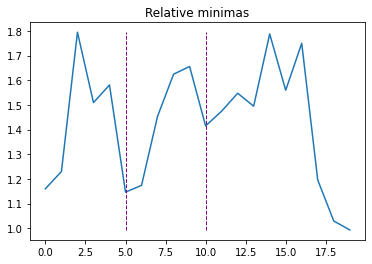

In [167]:
print(text_segmentation(post_sequences[5]))

In [169]:
print(text_segmentation(comment_sequences[5]))

-1


(array([1, 4]),)
I'm sure everyone who is depressed feels like talking to someone who can be non-judgmental.. 

 And strangers are the best source of non-judgemental breed of human.. There are some of you who not only know why they are depressed but even have a *plan* to curb this depression and fight against it.. But what we lack is someone whom we can share our achievements and pitfalls.. 

 And I don't think we have courage to discuss this with our regular friends.. So if you are looking for a friend , send me a pm.. P.S. I don't want a friend over pm - it's easy to lose friend online via email and messages.. I would prefer phone friend.. 


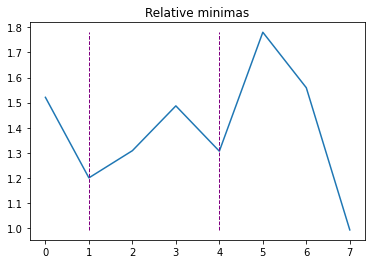

In [162]:
print(text_segmentation(post_sequences[6]))

(array([1, 5]),)
Where do i start?I just turned 18 a month ago.. 

 My medical condition is not the best(to say the least)(dont actually want to go deeper on that).My grandpa died 2 months ago and my father decided to cheat on my mom 1.5 months ago.. I dont have friends other than a few fakes.. I never get invited somewhere and im never involved in anything social.. I never found someone to love and i dont believe in love anymore, who would want something like me anyway?I have no talent l, im not smart and i look average at best.. 

 On top of that im not really successful in university.. The most enjoyable event for me this month was, drinking and drugging myself so i would be unconscious for 1.5 days somewhere out of city on some grassland.. I woke up covered in vomit and decided to search help.. I hate my self for not getting anything done on my own.. I wonder sometimes how people have to see me, as i have a pretty pathetic life.. I hate myself for loving it that sometimes the girls

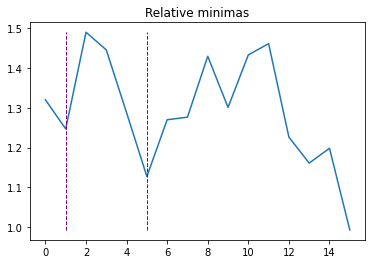

In [156]:
print(text_segmentation(post_sequences[7]))

In [138]:
print(text_segmentation(post_sequences[11]))

(array([6]),)
I finally did it.. It took me a week to work up the courage to do it.. I realized that I was staying with her because I didn't want to be alone.. I was afraid without her, I would lose myself and spiral into another episode.. But I'm fine, actually.. I dealt with the rage and sadness and the pain.. 

 I'm not going to say it didn't hurt to break up, but it wasn't an equal relationship.. I'm stronger than I thought.. I'm still the same person.. I can stand on my own without a crutch.. I wanted to share this to let everyone know, you're stronger than you think.. You are the one in charge of your depression.. Keep fighting.. 


In [139]:
print(text_segmentation(post_sequences[12]))

(array([3]),)
Today I finally told my father about my depression.. I told him straight to the face, that I want to commit suicide and he wasn't even sad or showed any emotions at all.. He just seemed fucking annoyed.. 

 He was talking about how it is probably puberty or something.. I dont even think, that he understood the seriousness of the situation when I was crying in my bed and said to him that I just was tired of living.. He will book me a therapy, so I will get the help I hopefully need.. But I don't think he understands... Thank u for reading.. I just felt like I would have to get it off my chest and I don't really know what to do now.. 


In [149]:
print(text_segmentation(post_sequences[21]))

(array([4]),)
We went official two weeks ago and I was quite honest with him about this to begin with, because I was scared this might later turn him away.. He is really supportive and would actually drag me off and help me get ready to go out on my bad days.. It's just that I don't want him to worry so much about me.. He said even if we're just friends he wouldn't abandon me and I feel as though I don't deserve him.. 

 He is finishing his thesis now and would honestly be much better off focusing his time on that.. I sometimes just avoid talking about it such that he wouldn't be worried but he'd still ask how everything is and I don't want to lie to him but I feel like he has better things to care for.. I wanted to not begin the relationship because I was scared this might get too much and he will become resentful.. I am not sure what I should do.. 


(array([], dtype=int64),)
Who cares?. NobodyIll more than likely be in the library like usual sitting by myself.. I'll be 21 tomorrow.. Year 20 was quite the ride, lost the girl i love.. Wish i could say that i dont love her anymore but thats not true.. She broke up with me for something that seems stupid to me but unfortunately not everyone operates in a moral gray area.. Tomorrows just another day to me, so fuck it.. All i want for my birthday is my girl back.. That being said i might as well make myself useful.. Anyone want to know about the deepweb?. How about the stock market, Ive been making spot on predictions for the past 3 weeks. 


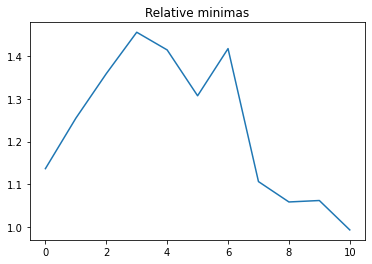

In [168]:
print(text_segmentation(post_sequences[22]))

8
(array([], dtype=int64),)
Hi everyone... Last time I spoke to my therapist was on February 3, and I explained to her how my thoughts were getting worse.. She referred me to a psychiatrist to discuss antidepressants, though I'm kind of nervous.. We talked briefly about what to expect, and she said it'd be more clinical than a therapy session might be.. But it wasn't in depth, I was wondering what I could expect from a psychiatric intake, and what (if anything) I should think about to prepare.. I'm kind of nervous about it because I don't know what to expect and I'm still not sure how to feel about antidepressants.. But I'm still going to go, so I want to know what I can expect.. I'm not sure who else to ask.. Thanks for reading :). 


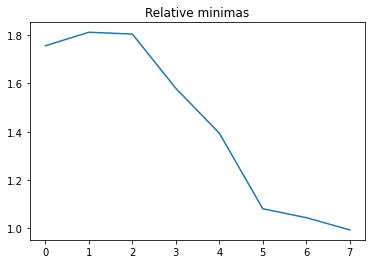

In [187]:
print(text_segmentation(post_sequences[8]))

6
(array([1]),)
It's not like a therapy session.. 

 If you remember your first meeting with your therapist, it'll probably be like that.. They ask a lot of questions about you in general, your psychiatric history, your symptoms, etc.. It's generally quite a long appointment, since they want to be thorough.. You don't have to prepare anything, just be ready to answer a lot of questions.. Toward the end they'll probably talk about medication options.. 


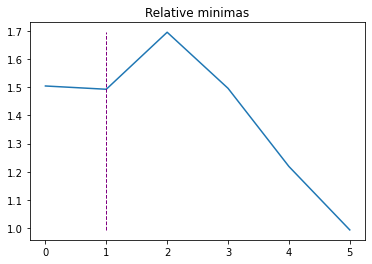

In [186]:
print(text_segmentation(comment_sequences[8]))

7
(array([2, 4]),)
My first full time job.. Great pay.. 

 Lots of effort and sacrifice but it's worthy.. I'm happy and feel satisfied.. 

 I have mayor depression and anxiety.. So this is a big deal for me.. I am willing to make it through.. 
5
(array([2]),)
It will take a huge worry off your mind to not have to worry as much about money.. Just don't live above your means like I sometimes do.. 

 I pay for all sorts of stupid distractions because I have a job at the moment when I need to save.. Just some advice, don't mean to rain on your parade.. It's a huge victory and treasure it =)  . 


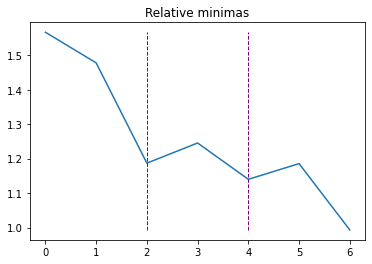

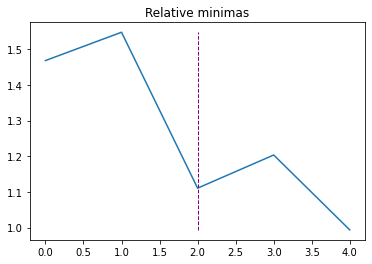

In [218]:
print(text_segmentation(post_sequences[24], 1))
print(text_segmentation(comment_sequences[24], 1))

In [219]:
i = 25
print(text_segmentation(post_sequences[i], 1))
print(text_segmentation(comment_sequences[i], 1))

4
-1
2
-1


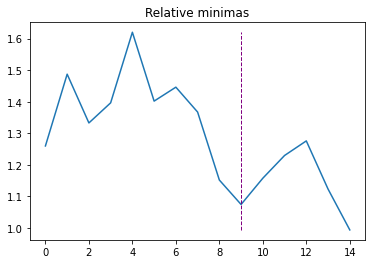

In [151]:
# lets create empty fig for our plor
fig, ax = plt.subplots()
### 6. Find relative minima of our vector. For all local minimas and save them to variable with argrelextrema function
minmimas = argrelextrema(activated_similarities, np.less, order=2) #order parameter controls how frequent should be splits. I would not reccomend changing this parameter.
# plot the flow of our text with activated similarities
sns.lineplot(y=activated_similarities, x=range(len(activated_similarities)), ax=ax).set_title('Relative minimas');
# Now lets plot vertical lines in order to see where we created the split
plt.vlines(x=minmimas, ymin=min(activated_similarities), ymax=max(activated_similarities), colors='purple', ls='--', lw=1, label='vline_multiple - full height')